In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# https://stackoverflow.com/questions/42869495/numpy-version-of-exponential-weighted-moving-average-equivalent-to-pandas-ewm
def exp_moving_average(data,alpha):

    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

def create_avg_plot(data, colors, labels):

    for i, (d1, d2, d3) in enumerate(data):
        d1 = exp_moving_average(d1, 1 / 1000)
        d2 = exp_moving_average(d2, 1 / 1000)
        d3 = exp_moving_average(d3, 1 / 1000)
        minimum = np.minimum.reduce([d1, d2, d3])
        maximum = np.maximum.reduce([d1, d2, d3])
        mean = (d1 + d2 + d3) / 3

        plt.plot(mean, color = colors[i],label = labels[i])
        plt.fill_between(np.linspace(0, len(d1), len(d1)), minimum, maximum, color = colors[i], alpha = 0.4)
        plt.legend(loc="upper left")
    
    plt.show()

In [35]:
with open("R_q_er_mb1.npy", "rb") as f:
    R1 = np.load(f, allow_pickle=True)

with open("R_q_er_mb2.npy", "rb") as f:
    R2 = np.load(f, allow_pickle=True)

with open("R_q_er_mb3.npy", "rb") as f:
    R3 = np.load(f, allow_pickle=True)

data = [(R1, R2, R3)]
colors = ["r"]
labels = ["Reward 1"]

create_avg_plot(data, colors, labels)

FileNotFoundError: [Errno 2] No such file or directory: 'R_q_er_mb2.npy'

### SARSA vs Q-Value

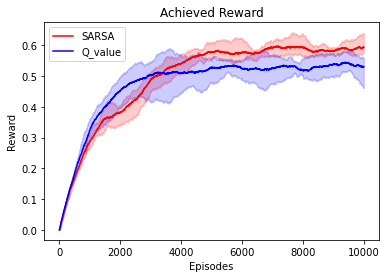

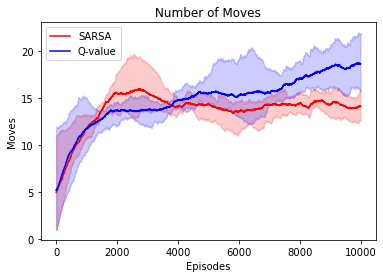

In [48]:
def create_avg_plot_SQ(data, colors, labels, ylabel, title):

    for i, (d1, d2, d3, d4, d5) in enumerate(data):
        d1 = exp_moving_average(d1, 1 / 1000)
        d2 = exp_moving_average(d2, 1 / 1000)
        d3 = exp_moving_average(d3, 1 / 1000)
        d4 = exp_moving_average(d4, 1 / 1000)
        d5 = exp_moving_average(d5, 1 / 1000)
        minimum = np.minimum.reduce([d1, d2, d3, d4, d5])
        maximum = np.maximum.reduce([d1, d2, d3, d4, d5])
        mean = (d1 + d2 + d3 + d4 + d5) / 5

        plt.plot(mean, color = colors[i],label = labels[i])
        plt.fill_between(np.linspace(0, len(d1), len(d1)), minimum, maximum, color = colors[i], alpha = 0.2)
        plt.legend(loc="upper left")
        plt.ylabel(ylabel)
        plt.xlabel("Episodes")
        plt.title(title)
    
    plt.show()

with open("data/Reward_Sarsa_1.npy", "rb") as f:
    R1 = np.load(f, allow_pickle=True)

with open("data/Reward_Sarsa_2.npy", "rb") as f:
    R2 = np.load(f, allow_pickle=True)

with open("data/Reward_Sarsa_3.npy", "rb") as f:
    R3 = np.load(f, allow_pickle=True)

with open("data/Reward_Sarsa_4.npy", "rb") as f:
    R4 = np.load(f, allow_pickle=True)
    
with open("data/Reward_Sarsa_5.npy", "rb") as f:
    R5 = np.load(f, allow_pickle=True)
    
with open("data/Reward_Q_1.npy", "rb") as f:
    QR1 = np.load(f, allow_pickle=True)

with open("data/Reward_Q_2.npy", "rb") as f:
    QR2 = np.load(f, allow_pickle=True)

with open("data/Reward_Q_3.npy", "rb") as f:
    QR3 = np.load(f, allow_pickle=True)

with open("data/Reward_Q_4.npy", "rb") as f:
    QR4 = np.load(f, allow_pickle=True)
    
with open("data/Reward_Q_5.npy", "rb") as f:
    QR5 = np.load(f, allow_pickle=True)
    
data = [(R1, R2, R3, R4, R5), (QR1, QR2, QR3, QR4, QR5)]
colors = ["r", "b"]
labels = ["SARSA", "Q_value"]
ylabel = "Reward"
title = "Achieved Reward"

create_avg_plot_SQ(data, colors, labels, ylabel, title)

with open("data/Moves_Sarsa_1.npy", "rb") as f:
    M1 = np.load(f, allow_pickle=True)

with open("data/Moves_Sarsa_2.npy", "rb") as f:
    M2 = np.load(f, allow_pickle=True)

with open("data/Moves_Sarsa_3.npy", "rb") as f:
    M3 = np.load(f, allow_pickle=True)

with open("data/Moves_Sarsa_4.npy", "rb") as f:
    M4 = np.load(f, allow_pickle=True)
    
with open("data/Moves_Sarsa_5.npy", "rb") as f:
    M5 = np.load(f, allow_pickle=True)
    
with open("data/Moves_Q_1.npy", "rb") as f:
    QM1 = np.load(f, allow_pickle=True)

with open("data/Moves_Q_2.npy", "rb") as f:
    QM2 = np.load(f, allow_pickle=True)

with open("data/Moves_Q_3.npy", "rb") as f:
    QM3 = np.load(f, allow_pickle=True)

with open("data/Moves_Q_4.npy", "rb") as f:
    QM4 = np.load(f, allow_pickle=True)
    
with open("data/Moves_Q_5.npy", "rb") as f:
    QM5 = np.load(f, allow_pickle=True)
    
data = [(M1, M2, M3, M4, M5), (QM1, QM2, QM3, QM4, QM5)]
colors = ["r", "b"]
labels = ["SARSA", "Q-value"]
ylabel = "Moves"
title = "Number of Moves"

create_avg_plot_SQ(data, colors, labels, ylabel, title)